In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"s23.csv")
df.head()


,RIL,day0,day6,day8,day15,day20,day22,day24,day27,day29,day31,day34,day36,day38,day41
0,TG_51,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,TG_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,ril_no_1,0.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,60.0,60.0,60.0,60.0,60.0,100.0
3,ril_no_2,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,ril_no_3,0.0,10.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,30.0,30.0,30.0,30.0,100.0


In [5]:
df.set_index('RIL' , inplace= True)

In [6]:
df.head()

,day0,day6,day8,day15,day20,day22,day24,day27,day29,day31,day34,day36,day38,day41
RIL,,,,,,,,,,,,,,
TG_51,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
TG_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
ril_no_1,0.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,60.0,60.0,60.0,60.0,60.0,100.0
ril_no_2,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
ril_no_3,0.0,10.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,30.0,30.0,30.0,30.0,100.0


In [16]:
filter1 = df['day8'] < 50.0
filter2 = df['day15'] >= 50.0
good_rils = df[(filter1) & (filter2)]
good_rils.index


,day0,day6,day8,day15,day20,day22,day24,day27,day29,day31,day34,day36,day38,day41
RIL,,,,,,,,,,,,,,
ril_no_105,0.0,16.67,33.33,50.00,50.0,50.0,66.67,83.33,83.33,83.33,83.33,100.0,100.0,100.0
ril_no_136,0.0,30.00,30.00,70.00,70.0,70.0,70.00,70.00,70.00,90.00,90.00,90.0,90.0,100.0
ril_no_142,0.0,46.67,46.67,53.33,60.0,60.0,60.00,60.00,60.00,60.00,60.00,60.0,60.0,100.0


In [18]:
good_names = ['ril_no_105', 'ril_no_136', 'ril_no_142']

In [7]:
days = [int(day.replace('day' , '')) for day in df.columns]
days

[0, 6, 8, 15, 20, 22, 24, 27, 29, 31, 34, 36, 38, 41]

In [8]:
def calculate_augpc(row):
    augpc = 0.0
    for i in range(1,len(row)):
        y1 = row.iloc[i-1]
        y2 = row.iloc[i]
        t1 = days[i-1]
        t2 = days[i]
        augpc += (y1 + y2) / 2 * (t2 - t1)
    
    return augpc

In [9]:
augpc_score = df.apply(calculate_augpc , axis= 1)

In [10]:
augpc_score.fillna(0 , inplace= True)
augpc_score

RIL
TG_51         3800.000
TG_22          150.000
ril_no_1      2215.000
ril_no_2      3800.000
ril_no_3       955.000
                ...   
ril_no_160       0.000
ril_no_161    3800.000
ril_no_162    1481.780
ril_no_163    3800.000
ril_no_164     621.875
Length: 166, dtype: float64

In [11]:
augpc_score = augpc_score.sort_values()
augpc_score


RIL
ril_no_91        0.00
ril_no_149       0.00
ril_no_70        0.00
ril_no_147       0.00
ril_no_135       0.00
               ...   
ril_no_61     3800.00
ril_no_60     3800.00
ril_no_163    3800.00
ril_no_81     3800.00
ril_no_128    3916.62
Length: 166, dtype: float64

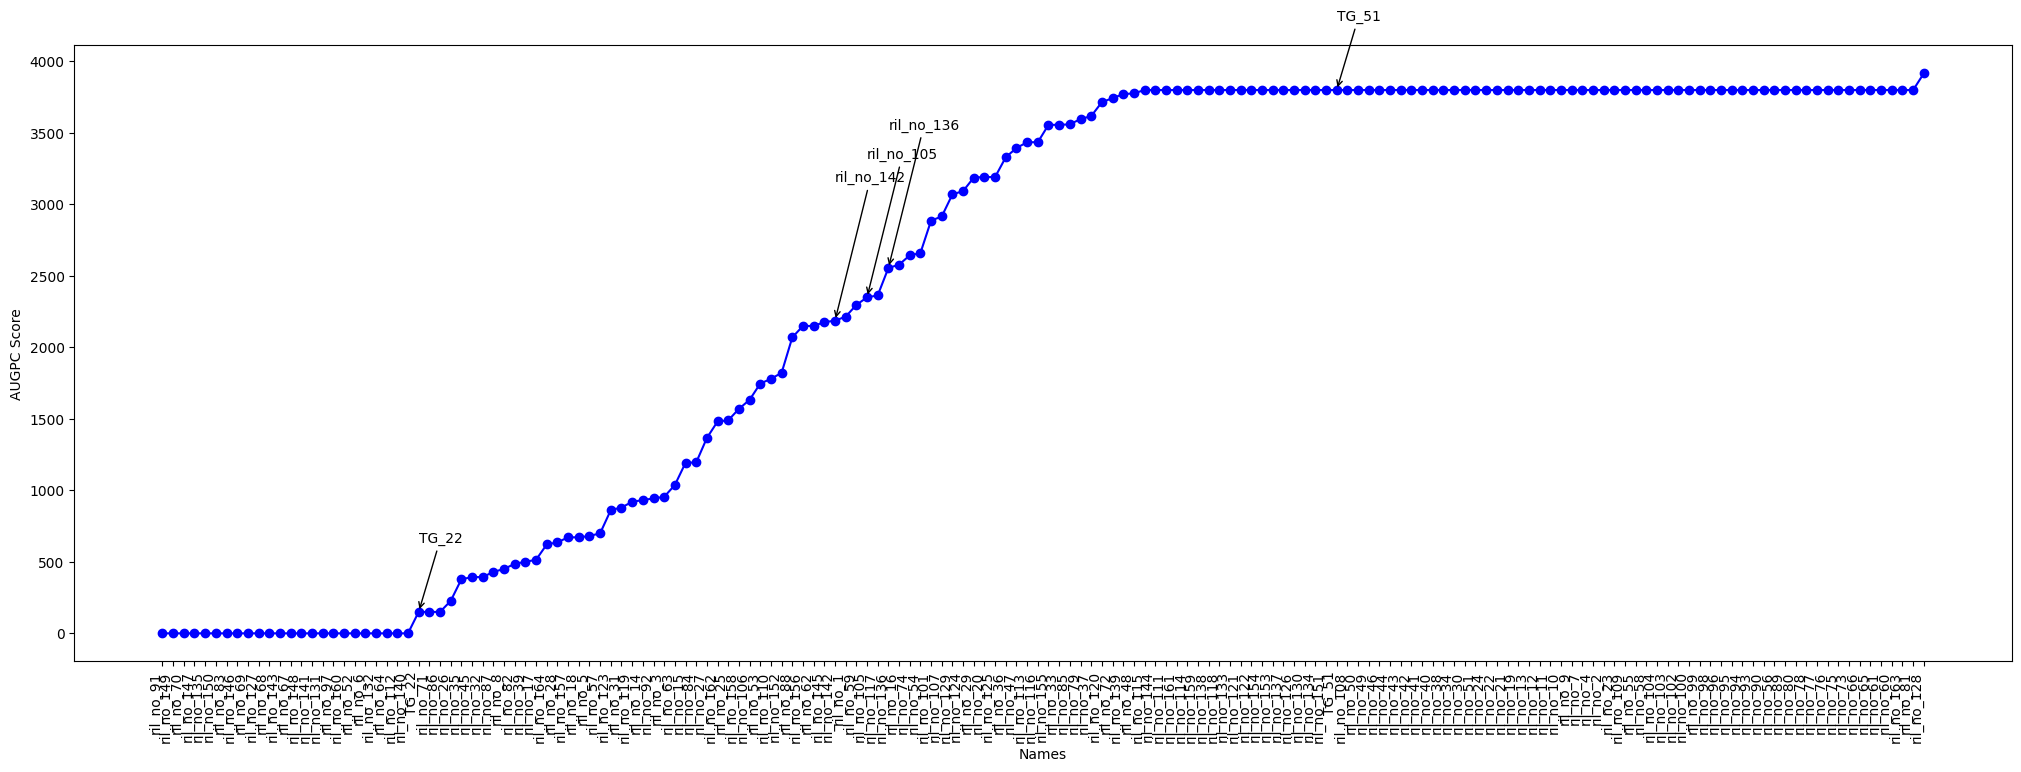

In [19]:
import matplotlib.pyplot as plt

# Plotting the AUGPC scores
plt.figure(figsize=(25, 8))
plt.plot(augpc_score, color='blue', marker='o')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')

# Add labels
plt.xlabel('Names')
plt.ylabel('AUGPC Score')



# Red arrow for 'TG_22'
plt.annotate('TG_22', xy=('TG_22', augpc_score['TG_22']),
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Green arrow for 'rill_no_1'
plt.annotate('TG_51' , xy = ('TG_51' , augpc_score['TG_51']),
             xytext=(0, 50), textcoords='offset points',
             arrowprops=dict(facecolor='green', arrowstyle='->'))

for point in good_names:
    plt.annotate(point , xy = (point , augpc_score[point]),
             xytext=(0, 100), textcoords='offset points',
             arrowprops=dict(facecolor='green', arrowstyle='->'))


# Display the plot
plt.show()
